In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import squarify

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.max_seq_items = 2000

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('.../IRCC/byCountry_1980_2016Q2.csv', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,Canada - Admissions of Permanent Residents by ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country of Citizenship,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Q1-Q2 2016
3,Philippines,"6,051","5,921","5,249","4,562","3,801","3,150","4,166","7,360","8,639","11,865","12,509","12,718","13,670","20,479","19,532","15,864","13,692","11,549","8,735","9,734","10,731","13,833","11,705","12,759","14,003","18,137","18,400","19,833","24,884","28,572","38,614","36,759","34,301","29,532","40,032","50,846","25,064"
4,India,"8,880","8,670","8,148","7,338","5,704","4,211","7,151","10,189","11,522","10,343","12,041","13,733","13,673","21,496","18,620","18,488","23,859","22,268","17,241","18,974","28,535","31,204","31,894","27,135","28,199","36,179","33,773","28,731","28,257","29,452","34,226","27,488","30,920","33,078","38,330","39,530","24,602"


In [3]:
# examine data types
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37    object
dtype: object

In [4]:
# clean and initialize dataframe 
data = data.T
data.columns = data.iloc[0]
data = data[1:]
data = data.loc[:, 'Country of Citizenship':'Total']
data.rename(columns={'Country of Citizenship' : 'year'}, inplace=True)

data

,year,Philippines,India,Syria,"China, People's Republic of",Pakistan,United States of America,Iran,France,United Kingdom and Colonies,Nigeria,"Korea, Republic of",Mexico,Eritrea,Ukraine,Bangladesh,Egypt,Jamaica,Haiti,Iraq,Afghanistan,Israel,Vietnam,Colombia,"Congo, Democratic Republic of the","Ireland, Republic of",Russia,Algeria,Lebanon,Morocco,Ethiopia,Australia,"Cameroon, Federal Republic of",Brazil,Sri Lanka,Germany,Romania,"Somalia, Democratic Republic of","Ivory Coast, Republic of",Tunisia,Poland,Venezuela,Cuba,Hong Kong,Moldova,Japan,"South Africa, Republic of",Italy,Turkey,Nepal,Jordan,Taiwan,Portugal,Stateless,El Salvador,Spain,Croatia,Dominican Republic,Mauritius,Hungary,New Zealand,"Netherlands, The",Guyana,Senegal,Thailand,Albania,"Serbia, Republic of",Peru,Ghana,Kenya,Burundi,"Indonesia, Republic of",Belgium,Greece,Palestinian Authority (Gaza/West Bank),St. Vincent and the Grenadines,Malaysia,Bulgaria,Myanmar (Burma),"Sudan, Democratic Republic of",Libya,Honduras,"Trinidad and Tobago, Republic of","Guinea, Republic of",Slovak Republic,Belarus,Czech Republic,Kazakhstan,St. Lucia,"Benin, Peoples Republic of",Rwanda,Zimbabwe,Argentina,"Togo, Republic of",Chile,Singapore,Switzerland,Armenia,Burkina-Faso,"Djibouti, Republic of",Ecuador,Cambodia,Lithuania,Uzbekistan,Kyrgyzstan,Guatemala,"Kosovo, Republic of","Mali, Republic of",Saudi Arabia,Fiji,Yemen,Bosnia-Herzegovina,Uganda,Sweden,Latvia,Madagascar,Azerbaijan,Macedonia,Costa Rica,Barbados,"Congo, People's Republic of the",Bhutan,Georgia,Austria,Bolivia,Grenada,"Chad, Republic of",Sierra Leone,"Mongolia, People's Republic of","Tanzania, United Republic of",Denmark,"Botswana, Republic of","Bahama Islands, The",Namibia,Belize,Finland,Nicaragua,"South Sudan, Republic Of",Central African Republic,Liberia,"Niger, Republic of the",Estonia,Gambia,Kuwait,Gabon Republic,Norway,"Panama, Republic of",Uruguay,Zambia,Angola,Mauritania,St. Kitts-Nevis,Paraguay,Antigua and Barbuda,Malawi,Macau,Tajikistan,United Arab Emirates,Slovenia,Bahrain,Dominica,"Montenegro, Republic of",Laos,Cyprus,Swaziland,Iceland,Turkmenistan,Comoros,Lesotho,"Equatorial Guinea, Republic of",Brunei,Malta,Guinea-Bissau,"Korea, People's Democratic Republic of",Oman,Luxembourg,Mozambique,Papua New Guinea,Qatar,"Samoa, Independent State Of",Seychelles,Czechoslovakia,Monaco,Nevis,Pitcairn Island,Surinam,Western Sahara,Yugoslavia,Africa NES,Andorra,Asia NES,Cape Verde Islands,Central America NES,Commonwealth of the Northern Mariana Islands,"East Timor, Democratic Republic of",Europe NES,Democratic Republic of Germany,Kiribati,Liechtenstein,"Maldives, Republic of","Marshall Islands, Republic of the","Micronesia, Federated States of",Nauru,New Caledonia,Ocean NES,"Palau, Republic of",Panama Canal Zone,"Samoa, American",San Marino,Sao Tome and Principe,Serbia and Montenegro,Soloman Islands,"Solomons, The",South America NES,Tonga,Tuvalu,Union of Soviet Socialist Republics,Vanuatu,West Indies NES,Other countries of citizenship,Country of citizenship not stated,Total
1,1980,"6,051","8,880",315,"5,123",978,"9,378","1,172","1,729","22,045",81,"1,011",409,0,0,83,612,"3,198","1,666",262,16,"1,403","1,191",266,15,781,0,80,"1,409",325,98,702,9,211,185,"1,626",375,7,14,58,863,103,306,0,0,701,"1,026","1,820",481,1,177,"1,002","4,473","41,897",110,211,0,40,306,205,602,"1,889","2,334",13,56,1,0,317,172,291,0,186,511,"1,065",0,147,786,24,80,20,5,26,958,0,0,0,0,0,69,2,6,72,368,5,"1,233",241,806,0,2,0,238,12,1,0,0,114,0,4,0,632,3,0,13,281,0,22,0,0,28,372,2,0,0,234,44,154,0,6,0,635,272,10,26,0,16,208,18,0,4,1,0,0,0,1,2,116,13,128,11,1,5,5,45,0,5,0,0,0,0,0,104,0,11,132,4,17,0,0,1,0,79,191,0,1,0,14,0,0,0,3,5,172,0,0,0,15,0,735,0,0,0,1,0,0,0,0,26,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,167,0,0,0,0,"143,138"
2,1981,"5,921","8,670",419,"6,682",972,"10,030","1,429","2,027","24,796",60,"1,456",394,0,0,84,660,"2,634","3,692",245,39,"1,711","1,829",326,16,895,0,67,"1,119",471,59,639,2,220,371,"1,977",438,10,8,51,"2,930",117,41,0,0,756,"1,118","

In [5]:
# Note that the last row's 'year' value must be changed to be manipulated by python
# Note that data type for the dataframe must be changed to be analyzed and graphed

# clean last row
data.iat[36,0] = '2016'
data = data.apply(lambda x: x.str.replace(',', ''))

for c in data.columns[1:]:
    data[c] = data[c].astype(float)
    
data.head()

,year,Philippines,India,Syria,"China, People's Republic of",Pakistan,United States of America,Iran,France,United Kingdom and Colonies,Nigeria,"Korea, Republic of",Mexico,Eritrea,Ukraine,Bangladesh,Egypt,Jamaica,Haiti,Iraq,Afghanistan,Israel,Vietnam,Colombia,"Congo, Democratic Republic of the","Ireland, Republic of",Russia,Algeria,Lebanon,Morocco,Ethiopia,Australia,"Cameroon, Federal Republic of",Brazil,Sri Lanka,Germany,Romania,"Somalia, Democratic Republic of","Ivory Coast, Republic of",Tunisia,Poland,Venezuela,Cuba,Hong Kong,Moldova,Japan,"South Africa, Republic of",Italy,Turkey,Nepal,Jordan,Taiwan,Portugal,Stateless,El Salvador,Spain,Croatia,Dominican Republic,Mauritius,Hungary,New Zealand,"Netherlands, The",Guyana,Senegal,Thailand,Albania,"Serbia, Republic of",Peru,Ghana,Kenya,Burundi,"Indonesia, Republic of",Belgium,Greece,Palestinian Authority (Gaza/West Bank),St. Vincent and the Grenadines,Malaysia,Bulgaria,Myanmar (Burma),"Sudan, Democratic Republic of",Libya,Honduras,"Trinidad and Tobago, Republic of","Guinea, Republic of",Slovak Republic,Belarus,Czech Republic,Kazakhstan,St. Lucia,"Benin, Peoples Republic of",Rwanda,Zimbabwe,Argentina,"Togo, Republic of",Chile,Singapore,Switzerland,Armenia,Burkina-Faso,"Djibouti, Republic of",Ecuador,Cambodia,Lithuania,Uzbekistan,Kyrgyzstan,Guatemala,"Kosovo, Republic of","Mali, Republic of",Saudi Arabia,Fiji,Yemen,Bosnia-Herzegovina,Uganda,Sweden,Latvia,Madagascar,Azerbaijan,Macedonia,Costa Rica,Barbados,"Congo, People's Republic of the",Bhutan,Georgia,Austria,Bolivia,Grenada,"Chad, Republic of",Sierra Leone,"Mongolia, People's Republic of","Tanzania, United Republic of",Denmark,"Botswana, Republic of","Bahama Islands, The",Namibia,Belize,Finland,Nicaragua,"South Sudan, Republic Of",Central African Republic,Liberia,"Niger, Republic of the",Estonia,Gambia,Kuwait,Gabon Republic,Norway,"Panama, Republic of",Uruguay,Zambia,Angola,Mauritania,St. Kitts-Nevis,Paraguay,Antigua and Barbuda,Malawi,Macau,Tajikistan,United Arab Emirates,Slovenia,Bahrain,Dominica,"Montenegro, Republic of",Laos,Cyprus,Swaziland,Iceland,Turkmenistan,Comoros,Lesotho,"Equatorial Guinea, Republic of",Brunei,Malta,Guinea-Bissau,"Korea, People's Democratic Republic of",Oman,Luxembourg,Mozambique,Papua New Guinea,Qatar,"Samoa, Independent State Of",Seychelles,Czechoslovakia,Monaco,Nevis,Pitcairn Island,Surinam,Western Sahara,Yugoslavia,Africa NES,Andorra,Asia NES,Cape Verde Islands,Central America NES,Commonwealth of the Northern Mariana Islands,"East Timor, Democratic Republic of",Europe NES,Democratic Republic of Germany,Kiribati,Liechtenstein,"Maldives, Republic of","Marshall Islands, Republic of the","Micronesia, Federated States of",Nauru,New Caledonia,Ocean NES,"Palau, Republic of",Panama Canal Zone,"Samoa, American",San Marino,Sao Tome and Principe,Serbia and Montenegro,Soloman Islands,"Solomons, The",South America NES,Tonga,Tuvalu,Union of Soviet Socialist Republics,Vanuatu,West Indies NES,Other countries of citizenship,Country of citizenship not stated,Total
1,1980,6051.0,8880.0,315.0,5123.0,978.0,9378.0,1172.0,1729.0,22045.0,81.0,1011.0,409.0,0.0,0.0,83.0,612.0,3198.0,1666.0,262.0,16.0,1403.0,1191.0,266.0,15.0,781.0,0.0,80.0,1409.0,325.0,98.0,702.0,9.0,211.0,185.0,1626.0,375.0,7.0,14.0,58.0,863.0,103.0,306.0,0.0,0.0,701.0,1026.0,1820.0,481.0,1.0,177.0,1002.0,4473.0,41897.0,110.0,211.0,0.0,40.0,306.0,205.0,602.0,1889.0,2334.0,13.0,56.0,1.0,0.0,317.0,172.0,291.0,0.0,186.0,511.0,1065.0,0.0,147.0,786.0,24.0,80.0,20.0,5.0,26.0,958.0,0.0,0.0,0.0,0.0,0.0,69.0,2.0,6.0,72.0,368.0,5.0,1233.0,241.0,806.0,0.0,2.0,0.0,238.0,12.0,1.0,0.0,0.0,114.0,0.0,4.0,0.0,632.0,3.0,0.0,13.0,281.0,0.0,22.0,0.0,0.0,28.0,372.0,2.0,0.0,0.0,234.0,44.0,154.0,0.0,6.0,0.0,635.0,272.0,10.0,26.0,0.0,16.0,208.0,18.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,2.0,116.0,13.0,128.0,11.0,1.0,5.0,5.0,45.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,104.0,0.0,11.0,132.0,4.0,17.0,0.0,0.0,1.0,0.0,79.0,191.0,0.0,1.0,0.0,14.0,0.0,0.0,0.0,3.0,5.0,172.0,0.0,0.0,0.0,15.0,0.0,735.0,0.0,0.0,0

In [6]:
data.tail()

,year,Philippines,India,Syria,"China, People's Republic of",Pakistan,United States of America,Iran,France,United Kingdom and Colonies,Nigeria,"Korea, Republic of",Mexico,Eritrea,Ukraine,Bangladesh,Egypt,Jamaica,Haiti,Iraq,Afghanistan,Israel,Vietnam,Colombia,"Congo, Democratic Republic of the","Ireland, Republic of",Russia,Algeria,Lebanon,Morocco,Ethiopia,Australia,"Cameroon, Federal Republic of",Brazil,Sri Lanka,Germany,Romania,"Somalia, Democratic Republic of","Ivory Coast, Republic of",Tunisia,Poland,Venezuela,Cuba,Hong Kong,Moldova,Japan,"South Africa, Republic of",Italy,Turkey,Nepal,Jordan,Taiwan,Portugal,Stateless,El Salvador,Spain,Croatia,Dominican Republic,Mauritius,Hungary,New Zealand,"Netherlands, The",Guyana,Senegal,Thailand,Albania,"Serbia, Republic of",Peru,Ghana,Kenya,Burundi,"Indonesia, Republic of",Belgium,Greece,Palestinian Authority (Gaza/West Bank),St. Vincent and the Grenadines,Malaysia,Bulgaria,Myanmar (Burma),"Sudan, Democratic Republic of",Libya,Honduras,"Trinidad and Tobago, Republic of","Guinea, Republic of",Slovak Republic,Belarus,Czech Republic,Kazakhstan,St. Lucia,"Benin, Peoples Republic of",Rwanda,Zimbabwe,Argentina,"Togo, Republic of",Chile,Singapore,Switzerland,Armenia,Burkina-Faso,"Djibouti, Republic of",Ecuador,Cambodia,Lithuania,Uzbekistan,Kyrgyzstan,Guatemala,"Kosovo, Republic of","Mali, Republic of",Saudi Arabia,Fiji,Yemen,Bosnia-Herzegovina,Uganda,Sweden,Latvia,Madagascar,Azerbaijan,Macedonia,Costa Rica,Barbados,"Congo, People's Republic of the",Bhutan,Georgia,Austria,Bolivia,Grenada,"Chad, Republic of",Sierra Leone,"Mongolia, People's Republic of","Tanzania, United Republic of",Denmark,"Botswana, Republic of","Bahama Islands, The",Namibia,Belize,Finland,Nicaragua,"South Sudan, Republic Of",Central African Republic,Liberia,"Niger, Republic of the",Estonia,Gambia,Kuwait,Gabon Republic,Norway,"Panama, Republic of",Uruguay,Zambia,Angola,Mauritania,St. Kitts-Nevis,Paraguay,Antigua and Barbuda,Malawi,Macau,Tajikistan,United Arab Emirates,Slovenia,Bahrain,Dominica,"Montenegro, Republic of",Laos,Cyprus,Swaziland,Iceland,Turkmenistan,Comoros,Lesotho,"Equatorial Guinea, Republic of",Brunei,Malta,Guinea-Bissau,"Korea, People's Democratic Republic of",Oman,Luxembourg,Mozambique,Papua New Guinea,Qatar,"Samoa, Independent State Of",Seychelles,Czechoslovakia,Monaco,Nevis,Pitcairn Island,Surinam,Western Sahara,Yugoslavia,Africa NES,Andorra,Asia NES,Cape Verde Islands,Central America NES,Commonwealth of the Northern Mariana Islands,"East Timor, Democratic Republic of",Europe NES,Democratic Republic of Germany,Kiribati,Liechtenstein,"Maldives, Republic of","Marshall Islands, Republic of the","Micronesia, Federated States of",Nauru,New Caledonia,Ocean NES,"Palau, Republic of",Panama Canal Zone,"Samoa, American",San Marino,Sao Tome and Principe,Serbia and Montenegro,Soloman Islands,"Solomons, The",South America NES,Tonga,Tuvalu,Union of Soviet Socialist Republics,Vanuatu,West Indies NES,Other countries of citizenship,Country of citizenship not stated,Total
33,2012,34301.0,30920.0,649.0,33011.0,11208.0,7870.0,7525.0,6271.0,6172.0,3441.0,5315.0,4227.0,1335.0,2263.0,2634.0,5550.0,2174.0,5856.0,4036.0,2635.0,2132.0,1732.0,3736.0,1711.0,725.0,2077.0,3762.0,1614.0,3878.0,1859.0,983.0,2503.0,1641.0,3338.0,1699.0,1588.0,1574.0,1023.0,1495.0,779.0,1366.0,1301.0,719.0,1416.0,1210.0,1244.0,438.0,1068.0,1185.0,1206.0,985.0,560.0,484.0,641.0,259.0,112.0,604.0,798.0,300.0,417.0,502.0,671.0,948.0,296.0,619.0,381.0,787.0,531.0,719.0,682.0,395.0,401.0,146.0,531.0,523.0,356.0,451.0,193.0,444.0,299.0,436.0,579.0,406.0,136.0,277.0,173.0,462.0,382.0,390.0,562.0,437.0,263.0,299.0,291.0,145.0,243.0,258.0,269.0,164.0,279.0,233.0,77.0,234.0,278.0,358.0,147.0,191.0,286.0,270.0,174.0,121.0,222.0,140.0,199.0,165.0,160.0,126.0,183.0,132.0,91.0,1075.0,148.0,102.0,83.0,142.0,97.0,72.0,68.0,224.0,93.0,64.0,60.0,24.0,33.0,62.0,106.0,6.0,44.0,58.0,95.0,26.0,18.0,73.0,74.0,53.0,34.0,47.0,46.0,70.0,77.0,21.0,55.0,50.0,9.0,33.0,34.0,54.0,36.0,39

## Exploratory Data Analysis (EDA)

In [7]:
data.describe()

,Philippines,India,Syria,"China, People's Republic of",Pakistan,United States of America,Iran,France,United Kingdom and Colonies,Nigeria,"Korea, Republic of",Mexico,Eritrea,Ukraine,Bangladesh,Egypt,Jamaica,Haiti,Iraq,Afghanistan,Israel,Vietnam,Colombia,"Congo, Democratic Republic of the","Ireland, Republic of",Russia,Algeria,Lebanon,Morocco,Ethiopia,Australia,"Cameroon, Federal Republic of",Brazil,Sri Lanka,Germany,Romania,"Somalia, Democratic Republic of","Ivory Coast, Republic of",Tunisia,Poland,Venezuela,Cuba,Hong Kong,Moldova,Japan,"South Africa, Republic of",Italy,Turkey,Nepal,Jordan,Taiwan,Portugal,Stateless,El Salvador,Spain,Croatia,Dominican Republic,Mauritius,Hungary,New Zealand,"Netherlands, The",Guyana,Senegal,Thailand,Albania,"Serbia, Republic of",Peru,Ghana,Kenya,Burundi,"Indonesia, Republic of",Belgium,Greece,Palestinian Authority (Gaza/West Bank),St. Vincent and the Grenadines,Malaysia,Bulgaria,Myanmar (Burma),"Sudan, Democratic Republic of",Libya,Honduras,"Trinidad and Tobago, Republic of","Guinea, Republic of",Slovak Republic,Belarus,Czech Republic,Kazakhstan,St. Lucia,"Benin, Peoples Republic of",Rwanda,Zimbabwe,Argentina,"Togo, Republic of",Chile,Singapore,Switzerland,Armenia,Burkina-Faso,"Djibouti, Republic of",Ecuador,Cambodia,Lithuania,Uzbekistan,Kyrgyzstan,Guatemala,"Kosovo, Republic of","Mali, Republic of",Saudi Arabia,Fiji,Yemen,Bosnia-Herzegovina,Uganda,Sweden,Latvia,Madagascar,Azerbaijan,Macedonia,Costa Rica,Barbados,"Congo, People's Republic of the",Bhutan,Georgia,Austria,Bolivia,Grenada,"Chad, Republic of",Sierra Leone,"Mongolia, People's Republic of","Tanzania, United Republic of",Denmark,"Botswana, Republic of","Bahama Islands, The",Namibia,Belize,Finland,Nicaragua,"South Sudan, Republic Of",Central African Republic,Liberia,"Niger, Republic of the",Estonia,Gambia,Kuwait,Gabon Republic,Norway,"Panama, Republic of",Uruguay,Zambia,Angola,Mauritania,St. Kitts-Nevis,Paraguay,Antigua and Barbuda,Malawi,Macau,Tajikistan,United Arab Emirates,Slovenia,Bahrain,Dominica,"Montenegro, Republic of",Laos,Cyprus,Swaziland,Iceland,Turkmenistan,Comoros,Lesotho,"Equatorial Guinea, Republic of",Brunei,Malta,Guinea-Bissau,"Korea, People's Democratic Republic of",Oman,Luxembourg,Mozambique,Papua New Guinea,Qatar,"Samoa, Independent State Of",Seychelles,Czechoslovakia,Monaco,Nevis,Pitcairn Island,Surinam,Western Sahara,Yugoslavia,Africa NES,Andorra,Asia NES,Cape Verde Islands,Central America NES,Commonwealth of the Northern Mariana Islands,"East Timor, Democratic Republic of",Europe NES,Democratic Republic of Germany,Kiribati,Liechtenstein,"Maldives, Republic of","Marshall Islands, Republic of the","Micronesia, Federated States of",Nauru,New Caledonia,Ocean NES,"Palau, Republic of",Panama Canal Zone,"Samoa, American",San Marino,Sao Tome and Principe,Serbia and Montenegro,Soloman Islands,"Solomons, The",South America NES,Tonga,Tuvalu,Union of Soviet Socialist Republics,Vanuatu,West Indies NES,Other countries of citizenship,Country of citizenship not stated,Total
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,3

- On average, 20,6186 immigrants have been coming to Canada in the recorded duration of this dataset (1980-2016 Q2)
- 50%-75% of the yearly totals range between 22,600 to 25,000 immigrants
- The highest total number of immigrants for a single year was 280,730
- The lowest total number of immigrants for a single year was 84,347

Having seen these numbers, it may be interesting to examine the years for the highest and lowest total counts. We can break down the respective total counts by citizenship, and potentially investigate policy trends (for Canada and the origin country) that may have contributed to the trend.

## EDA - Cumulative Totals

In [8]:
# create supplementary dataframe for 2016 and 2017 totals (obtained from Statista)
# https://www.statista.com/statistics/443063/number-of-immigrants-in-canada/
# Note that breakdown by country is not yet available
df = {'year': [2016, 2017], 'count': [323170, 272670]}
df = pd.DataFrame(df).set_index('year')
print(type(df.index))

# examine trend for total numbers of immigrants
tot = data[['year','Total']].set_index('year')
print(type(tot.index))

<class 'pandas.core.indexes.numeric.Int64Index'>
<class 'pandas.core.indexes.base.Index'>


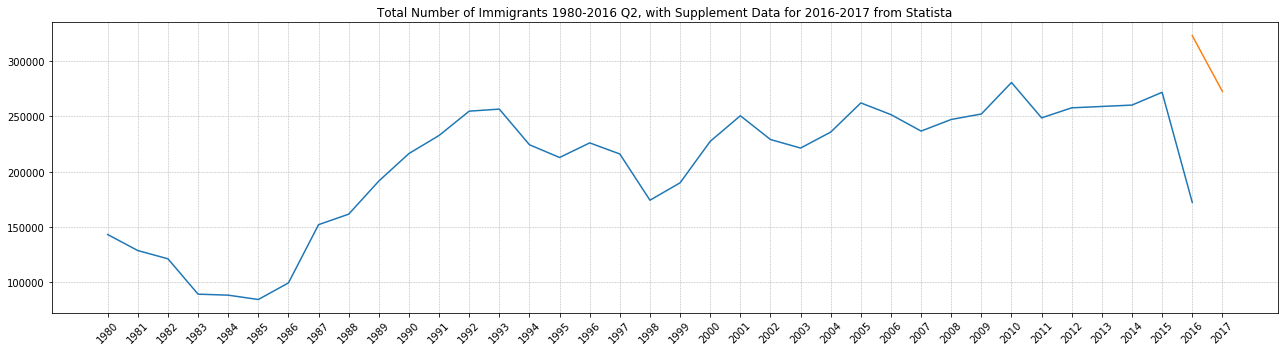

In [9]:
# Convert df index type to align with base data
df.index = df.index.map(str)

# plot
fig, ax = plt.subplots(figsize=(18,5))
plt.grid(linewidth=0.5, linestyle='--')

plt.plot(tot)
plt.plot(df)

plt.xticks(rotation=45)
plt.title('Total Number of Immigrants 1980-2016 Q2, with Supplement Data for 2016-2017 from Statista')

plt.tight_layout()
plt.show()

- Steady increase from 1985 (lowest recorded year) to 1993
- Cumulative decrease from 1993 to 1998, which remained the lowest recorded year before rising back up to the 2010 peak
- Highest peak in 2016
* The 2016 and 2017 totals were obtained from Statista, and the breakdown by citizenship was not available. For the purpose of this notebook, 2010 will be understood as the highest peak so that breakdown by citizenship can be observed.

Going forward, it'd be interesting to investigate policies and the yearly records for job availabilities and unemployment rate specific to immigrants.

## EDA - Breakdown by Citizenship

## Peak Year 

Recall from the exploratory data observation that 280,730 was the highest number of immigrants recorded for a single year.

In [10]:
highest = data[data['Total'] == 280730].iloc[:, :221]
###
# Filtered out columnns with zeroes here in case there's a need to visualize just the zeroes or 
# all other countries in the future
h_zeroes = highest.loc[:, (highest == 0).any(axis=0)]
highest = highest.loc[:, (highest != 0).any(axis=0)]
###
highest

,year,Philippines,India,Syria,"China, People's Republic of",Pakistan,United States of America,Iran,France,United Kingdom and Colonies,Nigeria,"Korea, Republic of",Mexico,Eritrea,Ukraine,Bangladesh,Egypt,Jamaica,Haiti,Iraq,Afghanistan,Israel,Vietnam,Colombia,"Congo, Democratic Republic of the","Ireland, Republic of",Russia,Algeria,Lebanon,Morocco,Ethiopia,Australia,"Cameroon, Federal Republic of",Brazil,Sri Lanka,Germany,Romania,"Somalia, Democratic Republic of","Ivory Coast, Republic of",Tunisia,Poland,Venezuela,Cuba,Hong Kong,Moldova,Japan,"South Africa, Republic of",Italy,Turkey,Nepal,Jordan,Taiwan,Portugal,Stateless,El Salvador,Spain,Croatia,Dominican Republic,Mauritius,Hungary,New Zealand,"Netherlands, The",Guyana,Senegal,Thailand,Albania,"Serbia, Republic of",Peru,Ghana,Kenya,Burundi,"Indonesia, Republic of",Belgium,Greece,Palestinian Authority (Gaza/West Bank),St. Vincent and the Grenadines,Malaysia,Bulgaria,Myanmar (Burma),"Sudan, Democratic Republic of",Libya,Honduras,"Trinidad and Tobago, Republic of","Guinea, Republic of",Slovak Republic,Belarus,Czech Republic,Kazakhstan,St. Lucia,"Benin, Peoples Republic of",Rwanda,Zimbabwe,Argentina,"Togo, Republic of",Chile,Singapore,Switzerland,Armenia,Burkina-Faso,"Djibouti, Republic of",Ecuador,Cambodia,Lithuania,Uzbekistan,Kyrgyzstan,Guatemala,"Kosovo, Republic of","Mali, Republic of",Saudi Arabia,Fiji,Yemen,Bosnia-Herzegovina,Uganda,Sweden,Latvia,Madagascar,Azerbaijan,Macedonia,Costa Rica,Barbados,"Congo, People's Republic of the",Bhutan,Georgia,Austria,Bolivia,Grenada,"Chad, Republic of",Sierra Leone,"Mongolia, People's Republic of","Tanzania, United Republic of",Denmark,"Botswana, Republic of","Bahama Islands, The",Namibia,Belize,Finland,Nicaragua,Central African Republic,Liberia,"Niger, Republic of the",Estonia,Gambia,Kuwait,Gabon Republic,Norway,"Panama, Republic of",Uruguay,Zambia,Angola,Mauritania,St. Kitts-Nevis,Paraguay,Antigua and Barbuda,Malawi,Macau,Tajikistan,United Arab Emirates,Slovenia,Bahrain,Dominica,"Montenegro, Republic of",Laos,Cyprus,Swaziland,Iceland,Turkmenistan,Comoros,Lesotho,"Equatorial Guinea, Republic of",Brunei,Malta,Guinea-Bissau,"Korea, People's Democratic Republic of",Oman,Luxembourg,Mozambique,Papua New Guinea,Qatar,"Samoa, Independent State Of",Seychelles,Monaco,Surinam,Yugoslavia,Cape Verde Islands,Europe NES,"Maldives, Republic of",San Marino,Sao Tome and Principe,Serbia and Montenegro,"Solomons, The",Tonga,Union of Soviet Socialist Republics,Other countries of citizenship,Country of citizenship not stated
31,2010,38614.0,34226.0,1040.0,30381.0,6812.0,8142.0,7478.0,4648.0,8719.0,3907.0,5537.0,3862.0,931.0,3159.0,4721.0,5984.0,2321.0,4733.0,5941.0,1758.0,2756.0,1942.0,5218.0,1238.0,548.0,2288.0,4753.0,3433.0,6244.0,1865.0,933.0,1802.0,2598.0,4420.0,2955.0,1922.0,1526.0,1067.0,1299.0,795.0,998.0,963.0,623.0,1988.0,1167.0,1239.0,434.0,1492.0,1392.0,1831.0,2629.0,629.0,698.0,768.0,174.0,91.0,455.0,1455.0,354.0,489.0,759.0,953.0,765.0,499.0,560.0,243.0,1282.0,802.0,508.0,529.0,712.0,363.0,101.0,652.0,434.0,800.0,556.0,556.0,613.0,384.0,385.0,914.0,395.0,135.0,438.0,168.0,377.0,249.0,290.0,396.0,494.0,459.0,354.0,340.0,805.0,287.0,252.0,186.0,123.0,353.0,200.0,57.0,289.0,157.0,265.0,226.0,170.0,330.0,398.0,211.0,168.0,216.0,159.0,70.0,178.0,209.0,188.0,190.0,121.0,75.0,1464.0,126.0,124.0,180.0,208.0,98.0,63.0,169.0,200.0,92.0,42.0,25.0,16.0,39.0,63.0,91.0,25.0,162.0,80.0,28.0,37.0,67.0,64.0,46.0,65.0,93.0,102.0,61.0,74.0,21.0,89.0,27.0,28.0,21.0,52.0,86.0,12.0,28.0,43.0,13.0,54.0,18.0,3.0,30.0,30.0,22.0,7.0,4.0,12.0,17.0,2.0,45.0,14.0,8.0,7.0,3.0,18.0,5.0,10.0,4.0,13.0,46.0,3.0,2.0,4.0,1.0,2.0,109.0,5.0,5.0,2.0,8.0,160.0


So 2010 was the year with the highest recorded number of newcomers. Let's look at the breakdowns. Since there are over 200 countries, let's look at the top 10 origin countries.

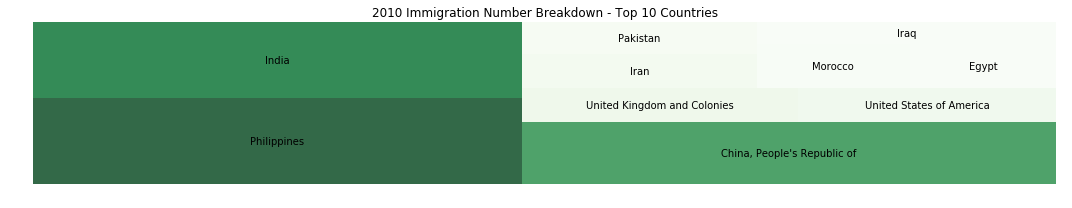

In [11]:
# filter top 10
tar = highest.T.reset_index()
tar.columns = ['country', 'count']
tar = tar[1:].sort_values('count', ascending=False).head(10)

# map values to color
cmap = matplotlib.cm.Greens
mini = min(tar['count'])
maxi = max(tar['count'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(c)) for c in tar['count']]

# plot
fig, ax = plt.subplots(figsize=(15,3))

squarify.plot(sizes=tar['count'], label=tar['country'], alpha=0.8, color=colors)
plt.title('2010 Immigration Number Breakdown - Top 10 Countries')

plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
list(h_zeroes)

['South Sudan, Republic Of',
 'Czechoslovakia',
 'Nevis',
 'Pitcairn Island',
 'Western Sahara',
 'Africa NES',
 'Andorra',
 'Asia NES',
 'Central America NES',
 'Commonwealth of the Northern Mariana Islands',
 'East Timor, Democratic Republic of',
 'Democratic Republic of Germany',
 'Kiribati',
 'Liechtenstein',
 'Marshall Islands, Republic of the',
 'Micronesia, Federated States of',
 'Nauru',
 'New Caledonia',
 'Ocean NES',
 'Palau, Republic of',
 'Panama Canal Zone',
 'Samoa, American',
 'Soloman Islands',
 'South America NES',
 'Tuvalu',
 'Vanuatu',
 'West Indies NES']

- In 2010, Philippines, India, and China (in that order) were the biggest contributors to the total number of immigrants coming into Canada.
- These countries were followed by UK, USA, with roughly similar number of immigrants coming from these countries.
- In 2010, Canada received zero immigrants from the countries listed above (below the graph)

### Lowest Recorded Year

In [13]:
lowest = data[data['Total'] == 84347].iloc[:, :221]
###
# Filtered out columnns with zeroes here in case there's a need to visualize just the zeroes or 
# all other countries in the future
l_zeroes = lowest.loc[:, (lowest == 0).any(axis=0)]
lowest = lowest.loc[:, (lowest != 0).any(axis=0)]
###

lowest

,year,Philippines,India,Syria,"China, People's Republic of",Pakistan,United States of America,Iran,France,United Kingdom and Colonies,Nigeria,"Korea, Republic of",Mexico,Bangladesh,Egypt,Jamaica,Haiti,Iraq,Afghanistan,Israel,Vietnam,Colombia,"Congo, Democratic Republic of the","Ireland, Republic of",Algeria,Lebanon,Morocco,Ethiopia,Australia,"Cameroon, Federal Republic of",Brazil,Sri Lanka,Germany,Romania,"Somalia, Democratic Republic of","Ivory Coast, Republic of",Tunisia,Poland,Venezuela,Cuba,Japan,"South Africa, Republic of",Italy,Turkey,Nepal,Jordan,Taiwan,Portugal,Stateless,El Salvador,Spain,Dominican Republic,Mauritius,Hungary,New Zealand,"Netherlands, The",Guyana,Senegal,Thailand,Peru,Ghana,Kenya,Burundi,"Indonesia, Republic of",Belgium,Greece,St. Vincent and the Grenadines,Malaysia,Bulgaria,Myanmar (Burma),"Sudan, Democratic Republic of",Libya,Honduras,"Trinidad and Tobago, Republic of","Guinea, Republic of",St. Lucia,"Benin, Peoples Republic of",Zimbabwe,Argentina,"Togo, Republic of",Chile,Singapore,Switzerland,Burkina-Faso,Ecuador,Cambodia,Lithuania,Guatemala,"Mali, Republic of",Saudi Arabia,Fiji,Yemen,Uganda,Sweden,Madagascar,Costa Rica,Barbados,"Congo, People's Republic of the",Austria,Bolivia,Grenada,"Chad, Republic of",Sierra Leone,"Tanzania, United Republic of",Denmark,"Botswana, Republic of","Bahama Islands, The",Namibia,Belize,Finland,Nicaragua,Liberia,Gambia,Kuwait,Norway,"Panama, Republic of",Uruguay,Zambia,Angola,Mauritania,St. Kitts-Nevis,Paraguay,Antigua and Barbuda,Bahrain,Dominica,Laos,Cyprus,Swaziland,Iceland,Comoros,Lesotho,Brunei,Malta,"Korea, People's Democratic Republic of",Luxembourg,Mozambique,Papua New Guinea,Seychelles,Czechoslovakia,Monaco,Surinam,Yugoslavia,Cape Verde Islands,Commonwealth of the Northern Mariana Islands,Democratic Republic of Germany,Liechtenstein,Tonga,Union of Soviet Socialist Republics
6,1985,3150.0,4211.0,385.0,1816.0,514.0,6543.0,1648.0,1177.0,9564.0,78.0,962.0,425.0,92.0,348.0,2938.0,1321.0,231.0,340.0,680.0,5907.0,214.0,11.0,287.0,44.0,1683.0,328.0,157.0,319.0,13.0,130.0,845.0,1441.0,604.0,10.0,23.0,57.0,2819.0,165.0,115.0,198.0,310.0,667.0,202.0,4.0,179.0,642.0,1451.0,12604.0,2769.0,98.0,84.0,164.0,522.0,148.0,510.0,2299.0,11.0,66.0,328.0,172.0,245.0,2.0,100.0,181.0,584.0,182.0,374.0,24.0,23.0,32.0,31.0,69.0,699.0,3.0,80.0,3.0,29.0,196.0,5.0,533.0,139.0,314.0,2.0,208.0,7.0,1.0,975.0,4.0,2.0,446.0,20.0,29.0,158.0,18.0,113.0,285.0,2.0,165.0,44.0,168.0,1.0,10.0,460.0,73.0,4.0,28.0,1.0,26.0,69.0,468.0,4.0,2.0,4.0,54.0,17.0,92.0,9.0,3.0,1.0,17.0,36.0,52.0,3.0,79.0,17.0,43.0,7.0,6.0,2.0,5.0,4.0,68.0,3.0,3.0,1.0,2.0,8.0,567.0,1.0,16.0,492.0,1.0,1.0,10.0,3.0,5.0,51.0


1985 was the lowest recorded year for the total number of immigrants. Similar to what we did before, let's look at the top 10 origin countries.

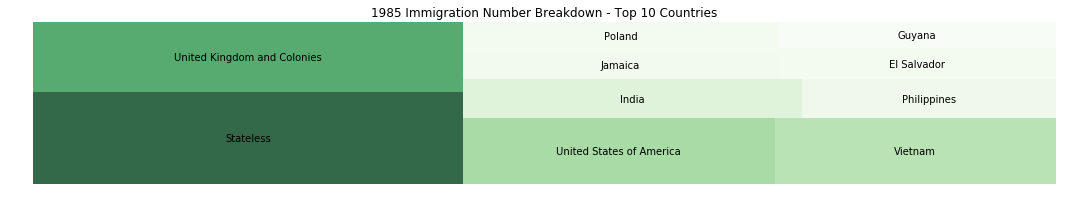

In [14]:
# filter top 10
tar = lowest.T.reset_index()
tar.columns = ['country', 'count']
tar = tar[1:].sort_values('count', ascending=False).head(10)

# map values to color
cmap = matplotlib.cm.Greens
mini = min(tar['count'])
maxi = max(tar['count'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(c)) for c in tar['count']]

# plot
fig, ax = plt.subplots(figsize=(15,3))

squarify.plot(sizes=tar['count'], label=tar['country'], alpha=0.8, color=colors)
plt.title('1985 Immigration Number Breakdown - Top 10 Countries')

plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
list(l_zeroes)

['Eritrea',
 'Ukraine',
 'Russia',
 'Hong Kong',
 'Moldova',
 'Croatia',
 'Albania',
 'Serbia, Republic of',
 'Palestinian Authority (Gaza/West Bank)',
 'Slovak Republic',
 'Belarus',
 'Czech Republic',
 'Kazakhstan',
 'Rwanda',
 'Armenia',
 'Djibouti, Republic of',
 'Uzbekistan',
 'Kyrgyzstan',
 'Kosovo, Republic of',
 'Bosnia-Herzegovina',
 'Latvia',
 'Azerbaijan',
 'Macedonia',
 'Bhutan',
 'Georgia',
 "Mongolia, People's Republic of",
 'South Sudan, Republic Of',
 'Central African Republic',
 'Niger, Republic of the',
 'Estonia',
 'Gabon Republic',
 'Malawi',
 'Macau',
 'Tajikistan',
 'United Arab Emirates',
 'Slovenia',
 'Montenegro, Republic of',
 'Turkmenistan',
 'Equatorial Guinea, Republic of',
 'Guinea-Bissau',
 'Oman',
 'Qatar',
 'Samoa, Independent State Of',
 'Nevis',
 'Pitcairn Island',
 'Western Sahara',
 'Africa NES',
 'Andorra',
 'Asia NES',
 'Central America NES',
 'East Timor, Democratic Republic of',
 'Europe NES',
 'Kiribati',
 'Maldives, Republic of',
 'Marshall Is

- As we can see, the highest number of immigrants in 1985 were stateless. This number was followed by those coming from UK and the USA.
- In 1985, Canada received zero immigrants from the countries listed above (below the graph)

### 2015 & 2016 Q1Q2

In [16]:
fif = data[data['year'] == '2015'].iloc[:, :221]
###
# Filtered out columnns with zeroes here in case there's a need to visualize just the zeroes or 
# all other countries in the future
fif_zeroes = fif.loc[:, (fif == 0).any(axis=0)]
fif = fif.loc[:, (fif != 0).any(axis=0)]
###

six = data[data['year'] == '2016'].iloc[:, :221]
###
# Filtered out columnns with zeroes here in case there's a need to visualize just the zeroes or 
# all other countries in the future
six_zeroes = six.loc[:, (six == 0).any(axis=0)]
six = six.loc[:, (six != 0).any(axis=0)]
###

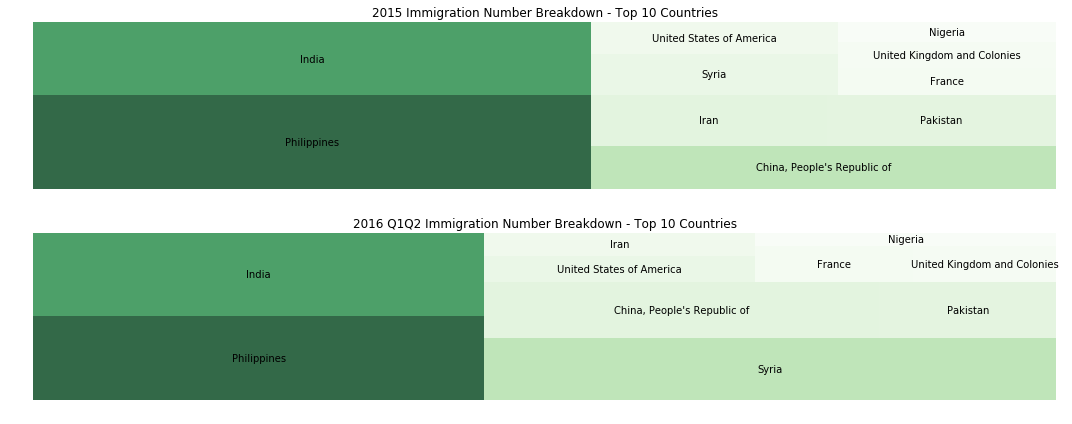

In [17]:
# filter top 10
tar = fif.T.reset_index()
tar.columns = ['country', 'count']
tar = tar[1:].sort_values('count', ascending=False).head(10)

tar1 = six.T.reset_index()
tar1.columns = ['country', 'count']
tar1 = tar1[1:].sort_values('count', ascending=False).head(10)


# map values to color
cmap = matplotlib.cm.Greens
mini = min(tar['count'])
maxi = max(tar['count'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(c)) for c in tar['count']]

cmap1 = matplotlib.cm.Greens
mini1 = min(tar1['count'])
maxi1 = max(tar1['count'])
norm1 = matplotlib.colors.Normalize(vmin=mini1, vmax=maxi1)
colors1 = [cmap1(norm1(c)) for c in tar1['count']]

# plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
ax0, ax1 = axes.flatten()

ax0 = squarify.plot(sizes=tar['count'], label=tar['country'], alpha=0.8, color=colors, ax=ax0)
ax0.set_title('2015 Immigration Number Breakdown - Top 10 Countries')

ax1 = squarify.plot(sizes=tar1['count'], label=tar1['country'], alpha=0.8, color=colors, ax=ax1)
ax1.set_title('2016 Q1Q2 Immigration Number Breakdown - Top 10 Countries')

ax0.axis('off')
ax1.axis('off')
plt.tight_layout()
plt.show()

The countries in top 10 list for both 2015 and 2016 Q1Q2 are identical, with the only difference being the number and proportion of newcomers admitted from each of these countries. Philippines and India still dominates, but there's been a dramatic increase of Syrian immigrants, and they were the third largest group (in omparison to 6th in 2015). Note, however, that the 2016 data is only from the first two quarters of the year, and immigrants from other countries may have increased in latter quarters of the year.

## EDA - Historical Trends

In [18]:
hist = data.set_index('year')

# create 'Total' row for each country and filter top 10
for column in hist:
    hist.loc['Total', column] = hist[column].sum()
    
countries = hist.loc['Total'].sort_values(ascending=False)[1:].head(10)
countries = list(countries.index)
countries

['India',
 "China, People's Republic of",
 'Philippines',
 'United Kingdom and Colonies',
 'Stateless',
 'Pakistan',
 'United States of America',
 'Iran',
 'Korea, Republic of',
 'Sri Lanka']

India, China, Philippines, UK, Pakistan, USA, Iran, South Korea, Sri Lanka, and 'stateless' are the top 10 cumulative contributors of immigrants to Canada. Let's look at the historical data for these origins. 

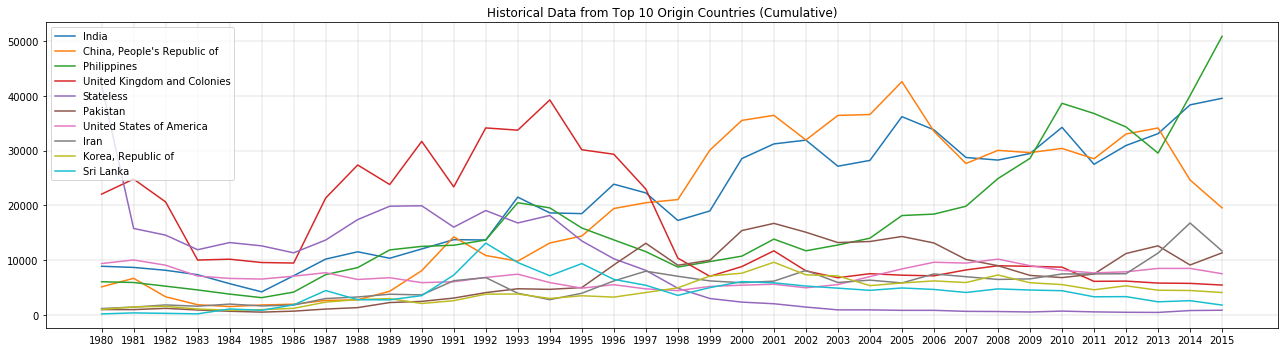

*For complete visualization, the graph depics data for 1980-2015, since 2016 only shows Q1 and Q2 data.


In [22]:
# filter cumulative data for top 10 
tar = hist.filter([c for c in countries], axis=1)[:-2]

# plot
fig, ax = plt.subplots(figsize=(18,5))
ax.grid(color='grey', linewidth=0.2, linestyle='-')

plt.plot(tar)
plt.legend(tar.columns)
plt.title('Historical Data from Top 10 Origin Countries (Cumulative)')

plt.tight_layout()
plt.show()
print('*For complete visualization, the graph depics data for 1980-2015, since 2016 only shows Q1 and Q2 data.')

From this graph, we can see:
- A steady increase of immigrants from Philippines over the years, with a dramatic surge starting in 2013 
- An increase of Chinese immigrants right before the turn of the 21st century, which peaked mid-century and started a downard trend since
- A steady increase of immigrants from India over time 
- A steady flow of US immigrants, with no noticeable peaks or downturns

In comparing 2015 and 2016 Q1Q2, we saw an increase of Syrian and Iranian immigrants. In fact, newcomers from Syria accounted for the 3rd largest group in the first two quarters of 2016, a big jump from the 6th largest in all of 2015. Nigeria and France were also part of the top 10 in both 2015 and 2016 Q1Q2, but neither of these countries are among the top 10 cumulative immigrant contributors. Let's take a closer look at the historical trend for these four countries. Again, we'll be looking at data up to 2015.

In [37]:
# filter target countries
countries = ['Syria', 'France', 'Nigeria', 'Iran']
tar = hist.filter([c for c in countries], axis=1)[:-2]

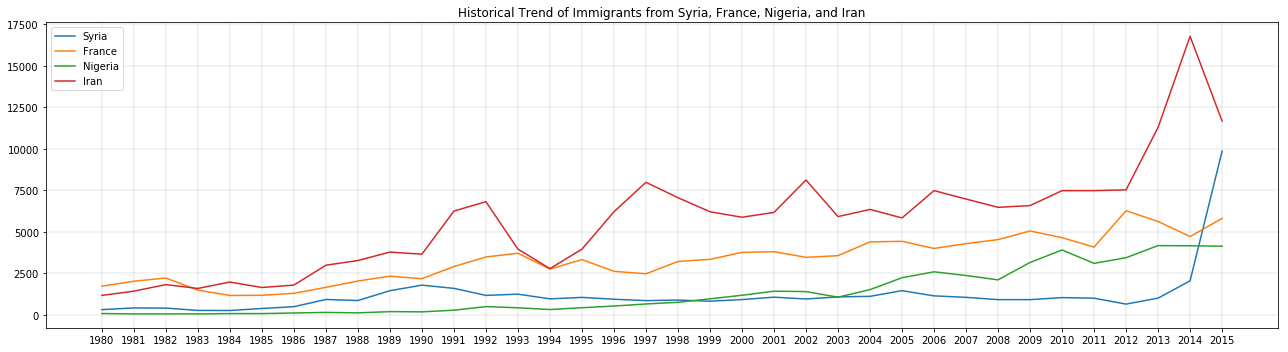

In [40]:
fig, ax = plt.subplots(figsize=(18,5))
ax.grid(color='grey', linewidth=0.2, linestyle='-')

plt.plot(tar)

plt.title('Historical Trend of Immigrants from Syria, France, Nigeria, and Iran')
plt.legend(tar)

plt.tight_layout()
plt.show()

- All four countries show an upward growth trend, with Iran being more irregular; we can observe a huge spike in 2014, and a sharp downturn in 2015 total
- After a slight decrease of Syrian immigrants between 2011 and 2012, there has been an increase since 2012, and a huge spike between 2014-15; it would be worth exploring the quarterly data to check alignment with PM terms
- Both Iran and Syria exhibited a rather sudden growth trend starting in 2012
- Both Nigeria and France demonstrate regular, steady growths